#### Import dependencies and load data

In [1]:
!pip install --user -r requirements.txt

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import json
import shutil
import WorldWeatherPy
from matplotlib import pyplot as plt
import seaborn as sns
import os
from joblib import dump, load

from WorldWeatherPy import DetermineListOfAttributes
from WorldWeatherPy import RetrieveByAttribute

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from joblib import dump
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

In [11]:
api_key = 'bd35020cdd3643f4b69142436222912'
attributes = ['date','time', 'tempC', 'windspeedKmph','weatherDesc', 'precipMM', 'humidity', 'visibility', 'pressure', 'cloudcover']

conditions = ['Sunny','Clear','Cloudy','Rain','Snow']
location_list = ['milan','turin','florence','bologna','rome','naples','palermo']

frequency = 3
start_date = '2016-1-1' 
end_date = '2023-1-1'              

In [12]:
for location in location_list:
    data = RetrieveByAttribute(api_key, attributes, location, start_date, end_date , frequency).retrieve_hist_data()
    data.to_csv(f'data/{location}.csv', encoding='utf-8', index=False) 



Retrieving weather data for milan


Retrieving data for milan from: 2016-01-01 to: 2016-01-31


/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.391323
Retrieving data for milan from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:02.762166
Retrieving data for milan from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.769941
Retrieving data for milan from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:04.832087
Retrieving data for milan from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:06.063428
Retrieving data for milan from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:07.033008
Retrieving data for milan from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:07.993567
Retrieving data for milan from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:08.814974
Retrieving data for milan from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:09.648032
Retrieving data for milan from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:10.680232
Retrieving data for milan from: 2016-11-01 to: 2016-11-30


/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.367001
Retrieving data for turin from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:02.356521
Retrieving data for turin from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.346958
Retrieving data for turin from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:04.353503
Retrieving data for turin from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:05.295668
Retrieving data for turin from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:06.202058
Retrieving data for turin from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:07.208305
Retrieving data for turin from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:08.207720
Retrieving data for turin from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:09.199799
Retrieving data for turin from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:10.094231
Retrieving data for turin from: 2016-11-01 to: 2016-11-30


/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.158782
Retrieving data for florence from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:02.319781
Retrieving data for florence from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.390047
Retrieving data for florence from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:04.510222
Retrieving data for florence from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:05.607895
Retrieving data for florence from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:06.861978
Retrieving data for florence from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:08.277386
Retrieving data for florence from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:09.506304
Retrieving data for florence from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:10.630641
Retrieving data for florence from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:11.769769
Retrieving data for florence fr

/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.199216
Retrieving data for bologna from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:02.405212
Retrieving data for bologna from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.714218
Retrieving data for bologna from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:04.747159
Retrieving data for bologna from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:05.774191
Retrieving data for bologna from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:07.035332
Retrieving data for bologna from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:08.295775
Retrieving data for bologna from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:09.528039
Retrieving data for bologna from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:10.497708
Retrieving data for bologna from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:11.698096
Retrieving data for bologna from: 2016-1

/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.151307
Retrieving data for rome from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:02.402279
Retrieving data for rome from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.520143
Retrieving data for rome from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:04.570407
Retrieving data for rome from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:06.068423
Retrieving data for rome from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:07.422028
Retrieving data for rome from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:08.555633
Retrieving data for rome from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:09.708803
Retrieving data for rome from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:11.027849
Retrieving data for rome from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:12.528117
Retrieving data for rome from: 2016-11-01 to: 2016-11-30
Time elaps

/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.561361
Retrieving data for naples from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:02.796748
Retrieving data for naples from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.998600
Retrieving data for naples from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:05.249606
Retrieving data for naples from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:06.622680
Retrieving data for naples from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:08.013860
Retrieving data for naples from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:09.207927
Retrieving data for naples from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:10.418521
Retrieving data for naples from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:11.945971
Retrieving data for naples from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:13.828655
Retrieving data for naples from: 2016-11-01 to: 2

/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:136: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_begin = pd.date_range(self.start_date, self.end_date, freq = 'MS', closed = 'right')
/home/jovyan/.local/lib/python3.8/site-packages/WorldWeatherPy/by_attribute.py:139: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_month_end = pd.date_range(self.start_date_datetime, self.end_date_datetime, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:01.178112
Retrieving data for palermo from: 2016-02-01 to: 2016-02-29
Time elapsed (hh:mm:ss.ms) 0:00:02.281834
Retrieving data for palermo from: 2016-03-01 to: 2016-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.677291
Retrieving data for palermo from: 2016-04-01 to: 2016-04-30
Time elapsed (hh:mm:ss.ms) 0:00:05.261852
Retrieving data for palermo from: 2016-05-01 to: 2016-05-31
Time elapsed (hh:mm:ss.ms) 0:00:06.362806
Retrieving data for palermo from: 2016-06-01 to: 2016-06-30
Time elapsed (hh:mm:ss.ms) 0:00:07.877542
Retrieving data for palermo from: 2016-07-01 to: 2016-07-31
Time elapsed (hh:mm:ss.ms) 0:00:09.598906
Retrieving data for palermo from: 2016-08-01 to: 2016-08-31
Time elapsed (hh:mm:ss.ms) 0:00:11.274140
Retrieving data for palermo from: 2016-09-01 to: 2016-09-30
Time elapsed (hh:mm:ss.ms) 0:00:12.574068
Retrieving data for palermo from: 2016-10-01 to: 2016-10-31
Time elapsed (hh:mm:ss.ms) 0:00:13.797478
Retrieving data for palermo from: 2016-1

In [13]:
data = pd.read_csv(f'data/milan.csv')
data.head(-10)

,date,time,tempC,windspeedKmph,weatherDesc,precipMM,humidity,visibility,pressure,cloudcover,city
0,2016-01-01,0,2,5,[{'value': 'Partly cloudy'}],0.0,89,10,1027,49,milan
1,2016-01-01,6,1,1,[{'value': 'Sunny'}],0.0,91,10,1027,16,milan
2,2016-01-01,12,6,5,[{'value': 'Sunny'}],0.0,63,10,1025,12,milan
3,2016-01-01,18,2,3,[{'value': 'Clear'}],0.0,79,10,1024,14,milan
4,2016-01-02,0,1,6,[{'value': 'Partly cloudy'}],0.0,78,10,1023,46,milan
...,...,...,...,...,...,...,...,...,...,...,...
10217,2022-12-29,6,7,3,[{'value': 'Cloudy'}],0.0,83,10,1024,70,milan
10218,2022-12-29,12,8,4,[{'value': 'Cloudy'}],0.0,78,10,1024,85,milan
10219,2022-12-29,18,7,3,[{'value': 'Patchy rain possible'}],0.1,86,10,1023,100,milan
10220,2022-12-30,0,7,3,[{'value': 'Patchy rain possible'}],0.1,84,10,1022,100,milan


In [14]:
null_values = data.isnull()
null_counts = null_values.sum()
null_counts

date             0
time             0
tempC            0
windspeedKmph    0
weatherDesc      0
precipMM         0
humidity         0
visibility       0
pressure         0
cloudcover       0
city             0
dtype: int64

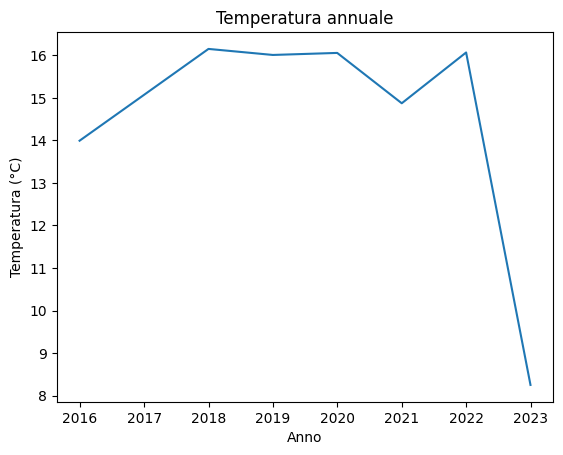

In [15]:
df = data

df['date']
df['date'] = pd.to_datetime(df['date'])
df_years = df.resample('A', on='date', label='left').mean()

# Seleziona l'indice del DataFrame come eixo x e la colonna 'tempC' come eixo y
x = df_years.index
y = df_years['tempC']

plt.plot(x, y)

plt.title('Temperatura annuale')
plt.xlabel('Anno')
plt.ylabel('Temperatura (°C)')

plt.show()


In [16]:
for location in location_list:

    data = pd.read_csv(f'data/{location}.csv')
    tmp = []

    for i, row in data.iterrows():
        found = False
        for j in conditions:
            if j.lower() in row['weatherDesc'].lower():
                data.at[i, 'weatherDesc'] = j
                found = True
                break
        if not found:
            tmp.append(i)

    data = data.drop(tmp)
    data = data.drop_duplicates()
    data = data.dropna()
    data[data.select_dtypes(include='number').columns] = data[data.select_dtypes(include='number').columns].replace(-0, 0)
    data = data.reset_index(drop=True)
    data.to_csv(f'data/{location}.csv', index=False)


In [17]:
data = pd.read_csv(f'data/milan.csv')
data.head(-10)

,date,time,tempC,windspeedKmph,weatherDesc,precipMM,humidity,visibility,pressure,cloudcover,city
0,2016-01-01,0,2,5,Cloudy,0.0,89,10,1027,49,milan
1,2016-01-01,6,1,1,Sunny,0.0,91,10,1027,16,milan
2,2016-01-01,12,6,5,Sunny,0.0,63,10,1025,12,milan
3,2016-01-01,18,2,3,Clear,0.0,79,10,1024,14,milan
4,2016-01-02,0,1,6,Cloudy,0.0,78,10,1023,46,milan
...,...,...,...,...,...,...,...,...,...,...,...
9366,2022-12-28,0,7,4,Cloudy,0.0,87,10,1028,50,milan
9367,2022-12-28,6,7,0,Cloudy,0.0,81,10,1027,83,milan
9368,2022-12-28,18,8,2,Cloudy,0.0,87,10,1025,78,milan
9369,2022-12-29,6,7,3,Cloudy,0.0,83,10,1024,70,milan


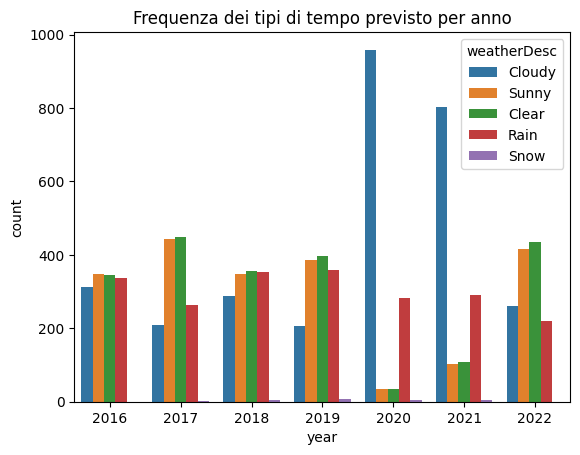

In [18]:
df = data

# Converte la colonna 'date' in una colonna di tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Crea una nuova colonna 'year' che contenga l'anno di ogni riga
df['year'] = df['date'].dt.year

# Crea una lista con tutti gli anni presenti nel dataset
years = df['year'].unique().tolist()

# Rimuovi l'ultimo elemento della lista
years.pop()

# Seleziona solo le righe del dataset con gli anni presenti nella lista 'years'
df = df[df['year'].isin(years)]

# Seleziona la colonna 'year' come eixo x e la colonna 'weatherDesc' come eixo y
x = df['year']
y = df['weatherDesc']

# Crea il grafico a barre
sns.countplot(x='year', hue='weatherDesc', data=df)

# Aggiungi un titolo
plt.title('Frequenza dei tipi di tempo previsto per anno')

# Mostra il grafico
plt.show()


## DATA PROCESSING

In [29]:
def data_pre_processing(location):

    data = pd.read_csv(f'data/{location}.csv')

    data = data.drop(['date','time','city'], axis=1) # Tuttavia, se si utilizza un modello di Random Forest su un dataset di diverse città, il modello potrebbe essere in grado di apprendere autonomamente queste differenze e quindi la colonna 'city' potrebbe non essere necessaria.
    y = data[['weatherDesc']]
    x = data.drop(['weatherDesc'], axis=1)
    columns = x.columns
    # Standardizza sia le x che le y utilizzando lo scaler
    scaler = StandardScaler()
    scaler.fit(x)
    X = scaler.transform(x)

    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Salva lo scaler e l'encoder
    os.makedirs(f'scaler_encoder/{location}', exist_ok=True)
    dump(encoder, f'scaler_encoder/{location}/{location}_encoder.joblib')
    dump(scaler, f'scaler_encoder/{location}/{location}_scaler.joblib')

    # Crea il DataFrame delle features standardizzate
    features = pd.DataFrame(X, columns = columns)
    
    return features, y
    
    '''
    preprocessed_data = {'features': features, 'y': y}
    preprocessed_data_json = json.dumps(preprocessed_data)
    os.makedirs(f'data/{location}', exist_ok=True)
    with open(f'data/{location}/{location}_preprocessed_data.csv','w') as f:
        json.dump(preprocessed_data_json, f)
    '''    

In [30]:
location = 'milan'
features, y = data_pre_processing(location)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [31]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9381 entries, 0 to 9380
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tempC          9381 non-null   float64
 1   windspeedKmph  9381 non-null   float64
 2   precipMM       9381 non-null   float64
 3   humidity       9381 non-null   float64
 4   visibility     9381 non-null   float64
 5   pressure       9381 non-null   float64
 6   cloudcover     9381 non-null   float64
dtypes: float64(7)
memory usage: 513.1 KB


In [32]:
# Ottieni le classi codificate
encoder = load('scaler_encoder/milan/milan_encoder.joblib')

classes = encoder.classes_

# Crea un dizionario con il numero associato alla classe
inverse_mapping = {i: classes[i] for i in range(len(classes))}

# Stampa le classi con il valore associato
for key, value in inverse_mapping.items():
    print(f"{value}: {key}")



Clear: 0
Cloudy: 1
Rain: 2
Snow: 3
Sunny: 4


## ML

In [33]:
# Criteria
criteria = ['gini','entropy']

bootstrap = True
max_features = 'sqrt'

penalty = 'l2'
solvers = ['newton-cg', 'lbfgs', 'liblinear']

# Decision tree
max_depth_dc_0 = 7
max_depth_dc_1 = 8

# Random Forest
n_estimators = 400
max_depth_rf_0 = 6
max_depth_rf_1 = 7

# Logistc Regression
C = 3.0
max_iter = 2500


In [34]:
def decision_tree(location, n_criterion):

    features, y, = data_pre_processing(location)
    
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42)

    criterion = criteria[n_criterion]

    if n_criterion == 0:
        max_depth = max_depth_dc_0
    if n_criterion == 1:
        max_depth = max_depth_dc_1

    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3)

    model = DecisionTreeClassifier(max_depth = 3, criterion = criterion)
    model.fit(X_train, y_train)

    # Save the model
    os.makedirs(f'models/{location}', exist_ok=True)
    dump(model, f'models/{location}/{location}_decision_tree_{criterion}.joblib')

    # Get predictions
    y_pred = model.predict(X_test)
    # Get accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [35]:
def random_forest(location, n_criterion):

    features, y = data_pre_processing(location)
    
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42)

    criterion = criteria[n_criterion]

    if n_criterion == 0:
        max_depth = max_depth_rf_0
    if n_criterion == 1:
        max_depth = max_depth_rf_1

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators = n_estimators, max_features = max_features, 
                                   criterion = criterion, max_depth = max_depth, bootstrap = bootstrap )
    model.fit(X_train, y_train)
    
    # Save the model
    os.makedirs(f'models/{location}', exist_ok=True)
    dump(model, f'models/{location}/{location}_random_forest_{criterion}.joblib')

    # Get predictions
    y_pred = model.predict(X_test)
    
    # Get accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [36]:
def logistic_regression(location, n_solver):

    features, y = data_pre_processing(location)
    
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42)

    solver = solvers[n_solver]

    model = LogisticRegression(penalty = penalty , C = C, solver = solver , max_iter = max_iter)
    #model = LogisticRegression()
    model.fit(X_train, y_train)

    # Save the model
    os.makedirs(f'models/{location}', exist_ok=True)
    dump(model, f'models/{location}/{location}_logistic_regression_{solver}.joblib')

    # Get predictions
    y_pred = model.predict(X_test)
    
    # Get accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

## Results

In [37]:
def show_results_dc(accuracy_file, location, accuracy_0, accuracy_1):

    with open(accuracy_file, 'a') as f:
        f.write('Decision_tree_gini(accuracy) in ' + location + ': ' + str(accuracy_0) + '\n')
        f.write('Decision_tree_entropy(accuracy) in ' + location + ': ' + str(accuracy_1) + '\n')

    print(f"Decision_tree_gini_{max_depth_dc_0} in {location}: {accuracy_0} ")
    print(f"Decision_tree_entropy_{max_depth_dc_1}(accuracy) in {location}: {accuracy_1} " + '\n')

In [38]:
def show_results_rf(accuracy_file, location, accuracy_0, accuracy_1):

    with open(accuracy_file, 'a') as f:
        f.write('Random_forest_gini(accuracy) in ' + location + ': ' + str(accuracy_0) + '\n')
        f.write('Random_forest_entropy(accuracy) in ' + location + ': ' + str(accuracy_1) + '\n')

    print(f"Random_forest_gini_{n_estimators}_{max_depth_rf_0}(accuracy) in {location}: {accuracy_0} ")
    print(f"Random_forest_entropy_{n_estimators}_{max_depth_rf_1}(accuracy) in {location}: {accuracy_1} " + '\n')

In [39]:
def show_results_lr(accuracy_file, location, accuracy_0, accuracy_1, accuracy_2):

    with open(accuracy_file, 'a') as f:
        f.write('Logistic_regression_newton-cg(accuracy) in ' + location + ': ' + str(accuracy_0) + '\n')
        f.write('Logistic_regression_lbfgs(accuracy) in ' + location + ': ' + str(accuracy_1) + '\n')
        f.write('Logistic_regression_liblinear(accuracy) in ' + location + ': ' + str(accuracy_2) + '\n')

    print(f"Logistic_regression_newton-cg_{C}_{max_iter}(accuracy) in {location}: {accuracy_0} ")
    print(f"Logistic_regression_lbfgs_{C}_{max_iter}(accuracy) in {location}: {accuracy_1} ")
    print(f"Logistic_regression_liblinear_{C}_{max_iter}(accuracy) in {location}: {accuracy_2} " + '\n')

In [40]:
def classify(location):
    os.makedirs(f'results/{location}', exist_ok=True)
    accuracy_file = f'results/{location}/accuracy.txt'
    
    accuracy_dc_0 = decision_tree(location, 0)
    accuracy_dc_1 = decision_tree(location, 1)

    accuracy_rf_0 = random_forest(location, 0)
    accuracy_rf_1 = random_forest(location, 1)

    accuracy_lr_0 = logistic_regression(location, 0)
    accuracy_lr_1 = logistic_regression(location, 1)
    accuracy_lr_2 = logistic_regression(location, 2)

    # Given the outputs from "decision_tree" and "logistic_regression"
    # the component "show_results" is called to print the results.
    show_results_dc(accuracy_file,location, accuracy_dc_0, accuracy_dc_1)
    show_results_rf(accuracy_file,location, accuracy_rf_0, accuracy_rf_1)
    show_results_lr(accuracy_file,location, accuracy_lr_0, accuracy_lr_1, accuracy_lr_2 )

In [41]:
for location in location_list:
    classify(location)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_7 in milan: 0.6742451154529308 
Decision_tree_entropy_8(accuracy) in milan: 0.627708703374778 

Random_forest_gini_400_6(accuracy) in milan: 0.6817051509769094 
Random_forest_entropy_400_7(accuracy) in milan: 0.6838365896980462 

Logistic_regression_newton-cg_3.0_2500(accuracy) in milan: 0.6664298401420959 
Logistic_regression_lbfgs_3.0_2500(accuracy) in milan: 0.6664298401420959 
Logistic_regression_liblinear_3.0_2500(accuracy) in milan: 0.6568383658969804 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_7 in turin: 0.6511875221552641 
Decision_tree_entropy_8(accuracy) in turin: 0.6331088266572138 

Random_forest_gini_400_6(accuracy) in turin: 0.6813186813186813 
Random_forest_entropy_400_7(accuracy) in turin: 0.6869904289259128 

Logistic_regression_newton-cg_3.0_2500(accuracy) in turin: 0.6756469337114498 
Logistic_regression_lbfgs_3.0_2500(accuracy) in turin: 0.6756469337114498 
Logistic_regression_liblinear_3.0_2500(accuracy) in turin: 0.6547323644097838 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_7 in florence: 0.686046511627907 
Decision_tree_entropy_8(accuracy) in florence: 0.6696947674418605 

Random_forest_gini_400_6(accuracy) in florence: 0.7180232558139535 
Random_forest_entropy_400_7(accuracy) in florence: 0.720203488372093 

Logistic_regression_newton-cg_3.0_2500(accuracy) in florence: 0.6805959302325582 
Logistic_regression_lbfgs_3.0_2500(accuracy) in florence: 0.6805959302325582 
Logistic_regression_liblinear_3.0_2500(accuracy) in florence: 0.6765988372093024 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_7 in bologna: 0.6418452597166727 
Decision_tree_entropy_8(accuracy) in bologna: 0.6062477297493644 

Random_forest_gini_400_6(accuracy) in bologna: 0.6719941881583726 
Random_forest_entropy_400_7(accuracy) in bologna: 0.6770795495822739 

Logistic_regression_newton-cg_3.0_2500(accuracy) in bologna: 0.6436614602252089 
Logistic_regression_lbfgs_3.0_2500(accuracy) in bologna: 0.6436614602252089 
Logistic_regression_liblinear_3.0_2500(accuracy) in bologna: 0.6338539774791137 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_7 in rome: 0.6796610169491526 
Decision_tree_entropy_8(accuracy) in rome: 0.6603389830508475 

Random_forest_gini_400_6(accuracy) in rome: 0.6874576271186441 
Random_forest_entropy_400_7(accuracy) in rome: 0.6861016949152542 

Logistic_regression_newton-cg_3.0_2500(accuracy) in rome: 0.672542372881356 
Logistic_regression_lbfgs_3.0_2500(accuracy) in rome: 0.672542372881356 
Logistic_regression_liblinear_3.0_2500(accuracy) in rome: 0.6647457627118644 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/loc

Decision_tree_gini_7 in naples: 0.6663282571912014 
Decision_tree_entropy_8(accuracy) in naples: 0.5983079526226734 

Random_forest_gini_400_6(accuracy) in naples: 0.6808798646362099 
Random_forest_entropy_400_7(accuracy) in naples: 0.6798646362098139 

Logistic_regression_newton-cg_3.0_2500(accuracy) in naples: 0.6710659898477157 
Logistic_regression_lbfgs_3.0_2500(accuracy) in naples: 0.6710659898477157 
Logistic_regression_liblinear_3.0_2500(accuracy) in naples: 0.6639593908629442 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Decision_tree_gini_7 in palermo: 0.6775844421699079 
Decision_tree_entropy_8(accuracy) in palermo: 0.6653019447287615 

Random_forest_gini_400_6(accuracy) in palermo: 0.6963493688161038 
Random_forest_entropy_400_7(accuracy) in palermo: 0.6963493688161038 

Logistic_regression_newton-cg_3.0_2500(accuracy) in palermo: 0.6721255544182873 
Logistic_regression_lbfgs_3.0_2500(accuracy) in palermo: 0.6721255544182873 
Logistic_regression_liblinear_3.0_2500(accuracy) in palermo: 0.6591606960081884 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [42]:
def best_models(location): 
    # Apri il file in modalità di lettura
    with open(f"results/{location}/accuracy.txt", "r") as file:
      # Leggi tutte le righe del file in una lista
      lines = file.readlines()

    # Inizializza un dizionario per memorizzare le prestazioni dei modelli
    performance = {}

    # Per ogni riga del file
    for line in lines:
      # Separa il nome del modello e il valore di accuratezza utilizzando il carattere ":" come separatore
      model, accuracy = line.split(":")
      # Rimuovi gli spazi iniziali e finali dal nome del modello
      model = model.strip()
      # Rimuovi gli spazi iniziali e finali dal valore di accuratezza e convertilo in un numero a virgola mobile
      accuracy = float(accuracy.strip())
      # Aggiungi il modello e il valore di accuratezza al dizionario delle prestazioni
      performance[model] = accuracy

    # Trova il modello con le prestazioni migliori utilizzando la funzione "max" e il dizionario delle prestazioni
    best_model = max(performance, key=performance.get)

    # Trova la posizione della prima parentesi tonda aperta
    open_parenthesis_index = best_model.index("(")

    # Estrai il nome del modello utilizzando la sottostringa da inizio riga fino alla posizione della parentesi tonda aperta
    model_name = best_model[:open_parenthesis_index]

    # Converti la prima lettera in minuscolo utilizzando il metodo "lower" sulla prima lettera
    model_name = model_name[0].lower() + model_name[1:]
    
    os.makedirs(f'best_models/{location}', exist_ok=True)
    
    # Specifica il percorso del file da copiare e del percorso di destinazione
    src_model = f"models/{location}/{location}_{model_name}.joblib"
    src_scaler = f"scaler_encoder/{location}/{location}_scaler.joblib"
    src_encoder = f"scaler_encoder/{location}/{location}_encoder.joblib"
    dst = f"best_models/{location}"

    # Copia il file utilizzando la funzione shutil.copy
    shutil.copy(src_model, dst)
    shutil.copy(src_scaler, dst)
    shutil.copy(src_encoder, dst)
    
    # Apri il file in modalità di scrittura
    with open(f"best_models/{location}/best_model_name.txt", "w") as file:
      # Scrivi la stringa nel file utilizzando il metodo write
      file.write(f"{model_name}")


In [43]:
for location in location_list:
    best_models(location)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 1.0, 'milan_random_forest_entropy - Test Data')
              precision    recall  f1-score   support

           0       0.46      0.74      0.57       635
           1       0.96      0.60      0.74       912
           2       0.96      0.97      0.97       639
           3       1.00      0.89      0.94         9
           4       0.49      0.44      0.46       620

    accuracy                           0.68      2815
   macro avg       0.77      0.73      0.74      2815
weighted avg       0.74      0.68      0.69      2815



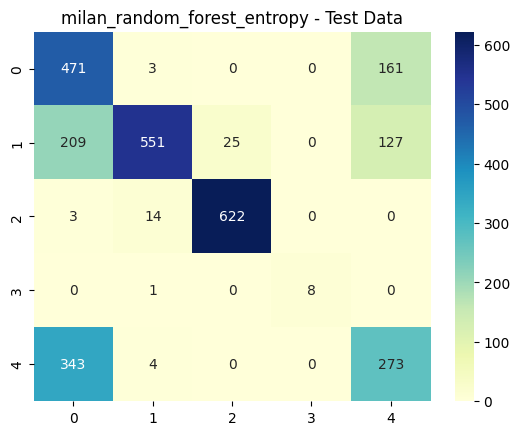

In [47]:
location = 'milan'
features, y = data_pre_processing(location)

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3,  random_state = 42)

# Apri il file in modalità di lettura
with open(f"best_models/{location}/best_model_name.txt", "r") as file:
  # Leggi la prima riga del file utilizzando il metodo readline
  model_name = file.readline()

model = load(f'best_models/{location}/{location}_{model_name}.joblib')
y_pred = model.predict(X_test)

test_matrix_0 = confusion_matrix(y_test, y_pred)
#plotting heatmap confusion matrix
print(sns.heatmap(test_matrix_0, annot=True, cmap="YlGnBu",fmt="d").set_title(
f'{location}_{model_name} - Test Data'))

#classification report for rf base model
test_report_base = classification_report(y_test, y_pred)
print(test_report_base)

Text(0.5, 1.0, 'milan_random_forest_entropy - Train Data')
              precision    recall  f1-score   support

           0       0.49      0.80      0.61      1489
           1       0.99      0.62      0.76      2131
           2       0.97      0.99      0.98      1468
           3       1.00      1.00      1.00        18
           4       0.53      0.48      0.50      1460

    accuracy                           0.71      6566
   macro avg       0.80      0.78      0.77      6566
weighted avg       0.77      0.71      0.72      6566



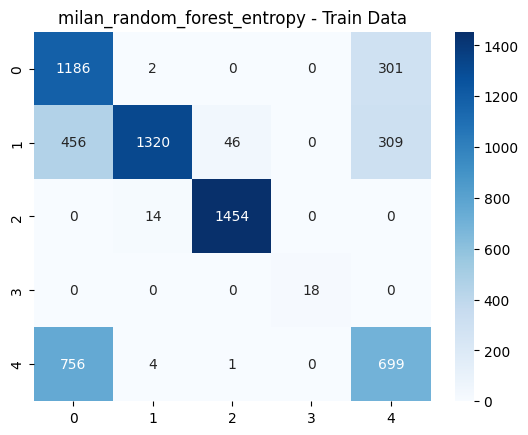

In [48]:
y_tpred_base = model.predict(X_train)

train_matrix_base = confusion_matrix(y_train, y_tpred_base)

#plotting heatmap confusion matrix
print(sns.heatmap(train_matrix_base, annot=True, cmap="Blues",fmt="d").set_title(
f'{location}_{model_name} - Train Data'))

#classification report for rf base model
train_report_base = classification_report(y_train, y_tpred_base)
print(train_report_base)


## Inference

In [7]:
scaler = load('scaler_encoder/milan/milan_scaler.joblib')
model = load('models/milan/milan_random_forest_gini.joblib')
encoder = load('scaler_encoder/milan/milan_encoder.joblib')

In [11]:
tempC           = 11
windspeedKmph   = 13
precipMM        = 3
humidity        = 1
visibility      = 5
pressure        = 5
cloudcover      = 1

features, y = data_pre_processing('milan')
 
feat_cols = features.columns
row = [tempC, windspeedKmph, precipMM, humidity, visibility, pressure, cloudcover]

df = pd.DataFrame([row], columns = feat_cols)
X = scaler.transform(df)
features = pd.DataFrame(X, columns = feat_cols)


prediction = model.predict(features)
prediction = encoder.inverse_transform(prediction)

print("Il meteo sarà : " + prediction )

['Il meteo sarà : Rain']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
